## REST API

REST (Representational State Transfer) - это архитектурный стиль, набор принципов проектирования взаимодействия компонентов веб приложения в сети

5 принципов REST:
+ Клиент-серверная архитектура
+ Stateless (сервер не хранит состояние между запросами, каждый запрос должен содержать всю информацию для его обработки)
+ Кэширование (кеширование ресурсов для быстродействия)
+ Единый стиль (соответствие семантики http метода смыслу запроса, единый URL для одинаковых сущностей, формат входных и выходных данных и др.)
+ Многоуровневая система (клиента не должно волновать внутреннее устройство сервера)

Семантики методов

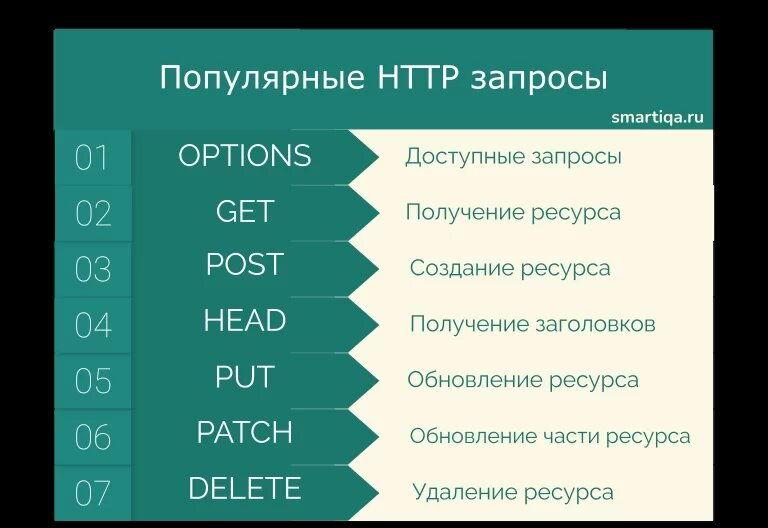

In [30]:
import requests

url = "https://test-fastapi-template-3880ff94f1d6.herokuapp.com/api/users"
user = requests.get(url + "/1")
user.json()

{'id': 1,
 'email': 'user@example.com',
 'role': 'USER',
 'hashed_password': '$2b$12$g5YIAQtRXYDefzHtLiqXo.eu1Za/wmyzcFkbfbm2.9HNjVhUkGqiK',
 'is_banned': False}

In [37]:
import requests

user_id = 1
url = f"https://test-fastapi-template-3880ff94f1d6.herokuapp.com/api/users/{user_id}"
user = requests.put(url, json={"email": "new_email@example.com", "password": "new_password"})
user.json()

{'id': 1,
 'email': 'new_email@example.com',
 'role': 'USER',
 'hashed_password': '$2b$12$.djoq9thhD42TSQfvgqIDuz5U1NgWVI0sjJoyDF8XcMZ02BILxQ7u',
 'is_banned': False}

In [38]:
import requests

user_id = 1
url = f"https://test-fastapi-template-3880ff94f1d6.herokuapp.com/api/users/{user_id}"
user = requests.delete(url)
user.json()

True

## Фреймворк FastAPI

Фреймворк - это набор библиотек и модулей, которые ускоряют разработку и позволяют не вдаваться в низкоуровневые детали, но взамен задает ограничения и влияет на архитектуру проекта

Самые популярные бэкенд-фреймворки на Python:
* Django
* Flask
* FastAPI
  
На нашем курсе мы займемся изучением последнего

FastAPI - популярный и простой фреймворк, который из коробки поддерживает много фичей:
* Скорость работы (один из самых шустрых фреймворков для Python благодаря ASGI связке Starlette + Uvicorn)
* Сериализация и валидация данных - Pydantic
* Автодокументация - Swagger
* [Отличная документация](https://fastapi.tiangolo.com/)

и многое другое...

## Pydantic

1. Аннотация типов - подсказки от IDE, статический анализ кода и др.
2. Скорость - core библиотеки написан на Rust (это как С/C++, но НАМНОГО сложнее)
3. Автогенерация JSON Schema (для Swagger и тд)
4. Кастомизация и большое кол-во встроенных типов, несколько режимов работы
5. Валидация данных

In [ ]:
from pydantic import BaseModel


# Базовое объявление пайдантик модели
class User(BaseModel):
    username: str
    age: int
    email: str
    password: str

In [ ]:
# Обычная инициализация модели
User(username="teadove", age=21, email="m1803003@edu.misis.ru", password="Pr1Nciple")

User(username='teadove', age=21, email='m1803003@edu.misis.ru', password='Pr1Nciple')

In [ ]:
# Десериализация из JSON
User.model_validate_json(
    '{"username": "teadove", "age": 21, "email": "m1803003@edu.misis.ru", "password": "Pr1Nciple"}'
)

User(username='teadove', age=21, email='m1803003@edu.misis.ru', password='Pr1Nciple')

In [ ]:
# Десериализация из словаря
user = User.model_validate(
    {"username": "teadove", "age": 21, "email": "m1803003@edu.misis.ru", "password": "Pr1Nciple"}
)
user

User(username='teadove', age=21, email='m1803003@edu.misis.ru', password='Pr1Nciple')

In [ ]:
# Сериализация в json
user.model_dump_json()

'{"username":"teadove","age":21,"email":"m1803003@edu.misis.ru","password":"Pr1Nciple"}'

In [ ]:
# Сериализация в словарь
user.model_dump()

{'username': 'teadove',
 'age': 21,
 'email': 'm1803003@edu.misis.ru',
 'password': 'Pr1Nciple'}

In [ ]:
import re
from pydantic import BaseModel, field_validator


class User(BaseModel):
    username: str
    age: int
    email: str
    password: str

    @field_validator("age")
    @classmethod
    def validate_age(cls, value):
        if value < 18:
            raise ValueError("User must be adult")
        return value

    @field_validator("email")
    @classmethod
    def validate_email(cls, value):
        if not bool(re.fullmatch(r"[\w.-]+@[\w-]+\.[\w.]+", value)):
            raise ValueError("Email is invalid")
        return value.lower()

    @field_validator("password")
    @classmethod
    def validate_password(cls, value):
        password_length = len(value)
        if password_length < 8 or password_length > 16:
            raise ValueError("The password must be between 8 and 16 characters long")
        return value


# Valid User
valid_user = {"username": "test_name", "age": 20, "email": "NAME@test.gr", "password": "123456789"}
user = User.model_validate(valid_user)

# Invalid User
# invalid_user = {
#     'username': 'test_name',
#     'age': 16,
#     'email': 'name_test.gr',
#     'password': '1234'
# }
# user = User.model_validate(invalid_user)
user

User(username='test_name', age=20, email='name@test.gr', password='123456789')

## Полезные материалы

1. [Не HTTP единым. Классное видео про клиент-серверную архитектуру и общее их взаимодействие](https://www.youtube.com/watch?v=XaTwnKLQi4A)
2. [Необходимая база для веб-разработчика](https://vladislaveremeev.gitbook.io/qa_bible/seti-i-okolo-nikh)
3. [Подробнее про HTTP](https://selectel.ru/blog/http-request/)
4. [Серия статей про HTTP от Avito.Tech](https://habr.com/ru/companies/avito/articles/710660/)
5. [Справка по модулю json в Python](https://pyneng.readthedocs.io/ru/latest/book/17_serialization/json.html)
6. [Про REST API от Яндекса](https://cloud.yandex.ru/docs/glossary/rest-api)
7. Курсы Г.С. Крынецкой в МИСИС - "Вычислительные машины и сети" и "Сетевые технологии"
8. [Отличная документация по FastApi](https://fastapi.tiangolo.com/)
9. [Немного про то, как FastAPI устроен под капотом](https://habr.com/ru/articles/708678/)
   